> 教你学会 Pandas 不是我的目的，**教你轻松玩转 Pandas 才是我的目的**。我会通过一系列实例来带入 Pandas 的知识点，让你在学习 Pandas 的路上不再枯燥。

> 声明：我所写的**轻松玩转 Pandas 教程都是免费的**，如果对你有帮助，你可以持续关注我。

数据分析的结果不仅仅只是你来看的，更多的时候是给需求方或者老板来看的，为了更直观地看出结果，数据可视化是必不可少的一个环节。这里带大家来看下一些常用的图形的画法。

In [1]:
# 导入相关库
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use("ggplot")
%matplotlib inline

np.random.seed(100)

Pandas 的数据可视化的实现底层依赖于 matplotlib，所以画图时很多基础知识需要涉及到 matplotlib。画图其实就是跟各种数字打交道，这里我们先给伪造一些数据。

In [2]:
df = pd.DataFrame(np.random.randint(-10, 10, (10, 3)), index=pd.date_range("1/1/2000", periods=10), columns=list("ABC"))
df = df.cumsum()
df.head()

,A,B,C
2000-01-01,-2,-7,-3
2000-01-02,3,-1,-3
2000-01-03,-5,-9,-11
2000-01-04,-1,-17,-4
2000-01-05,5,-12,-10


## 折线图

生成数据之后，我们看下如何进行画图。其实非常简单的，调用 `plot` 方法就可以看到画图的结果了。

默认情况下参数 `kind="line"` 表示图的类型为折线图。通过折线图可以看出数据随着某个变量的变化趋势。

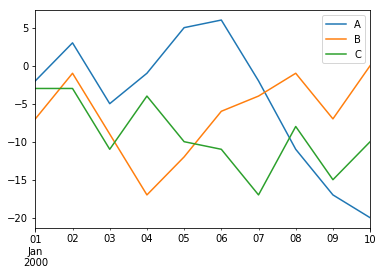

In [3]:
df.plot()

可以看看到，默认情况下，`plot` 会将索引作为 x 轴，列作为 y 轴，然后画出 line 图。但是有时候，我们需要自己指定 x 轴和 y 轴，这可如何是好呢？

别怕，Pandas 非常方便的为我们提供了参数 `x` 和 `y`。

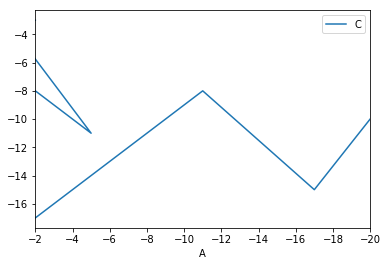

In [4]:
df.plot(x="A", y="C")

## 柱状图

通过柱状图可以对比多个值的差别。如果想要画出柱状图，可以将参数 `kind` 设置为 `bar` 或者 `barh`。

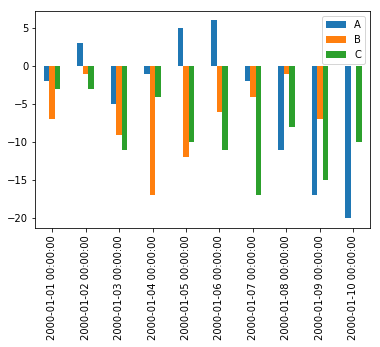

In [5]:
df.plot(kind="bar")

可以看到，设置 `kind="bar"` 之后，图形以索引为 x 轴， 列为 y 轴。

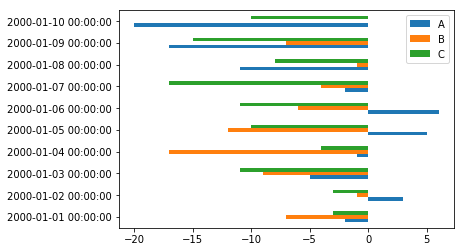

In [6]:
df.plot(kind="barh")

可以看到，设置 `kind="barh"` 之后，图形以列为 x 轴， 索引为 y 轴。同样我们也可以自己指定 x 轴和 y 轴。

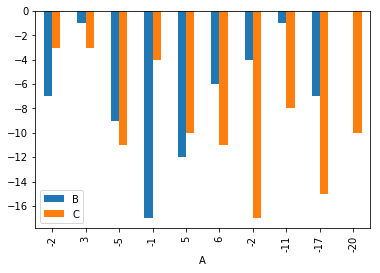

In [7]:
df.plot(kind="bar", x="A", y=["B", "C"])

此外，如果想要生成堆叠条形图的haunted，可以设置参数 `stacked=True`。

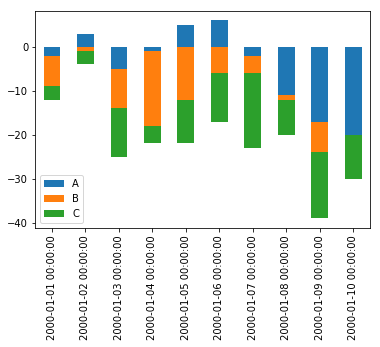

In [8]:
df.plot(kind="bar", stacked=True)

## 直方图

直方图是一种展示数据频数/率的特殊的柱状图。如果想要画出直方图，可以将参数 `kind` 设置为 `hist`。

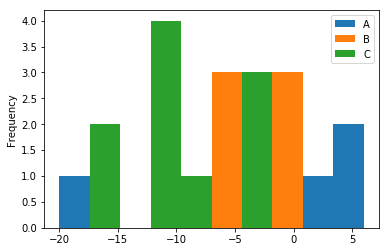

In [9]:
df.plot(kind="hist")

可以通过设置参数 `bins` 来改变 bin 的大小。

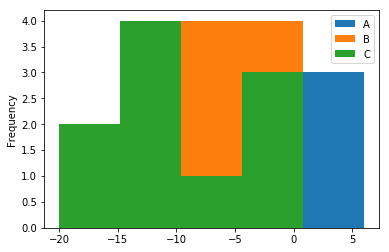

In [10]:
df.plot(kind="hist", bins=5)

## 箱线图

通过箱线图可以展示出分位数，具体包括上四分位数、下四分位数、中位数以及上下5%的极值。如果想要画出箱线图，可以将参数 `kind` 设置为 `box`。

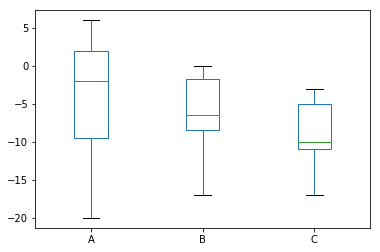

In [11]:
df.plot(kind="box")

## 区域图

如果想要画出区域图，可以将参数 `kind` 设置为 `area`。

默认情况下，区域图是堆积的，要生成堆积的区域图图，每列必须全部为正值或全为负值。

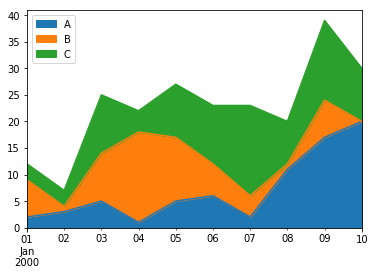

In [12]:
df.abs().plot(kind="area")

想要生成不堆积的区域图，设置参数 `stacked=False` 即可。

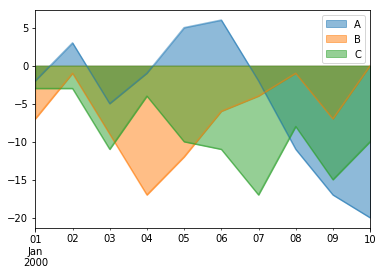

In [13]:
df.plot(kind="area", stacked=False)

## 散点图

如果想要画出散点图，可以将参数 `kind` 设置为 `scatter`，同时需要指定 x 和 y。


通过散点图可以探索变量之间的关系。

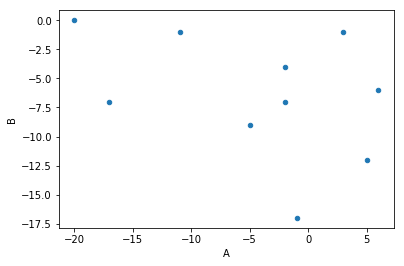

In [14]:
df.plot(kind="scatter", x="A", y="B")

可以设置参数 `c` 作为列的名称以为每个点提供颜色。

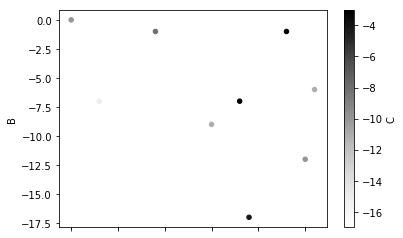

In [15]:
df.plot(kind="scatter", x="A", y="B", c="C")

如果想要在单个轴上绘制多个列组，需要指定 ax。

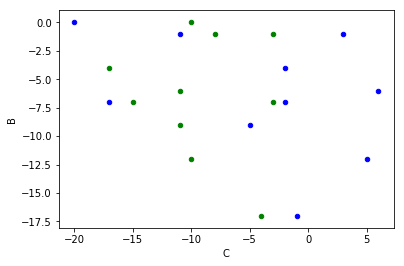

In [16]:
ax = df.plot(kind="scatter", x="A", y="B", color="blue")
df.plot(kind="scatter", x="C", y="B", color="green", ax=ax)

## 饼图

如果想要画出饼图，可以将参数 `kind` 设置为 `pie`。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5741E3630>],
      dtype=object)

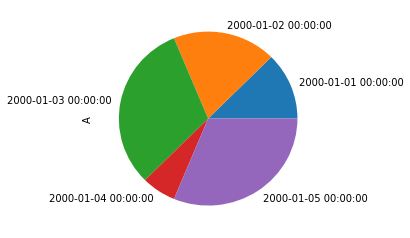

In [17]:
a = df.A[:5]
a.abs().plot.pie(subplots=True, figsize=(4, 4))

如果想要自动计算出比例，可以设置参数 `autopct`。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C57531D358>],
      dtype=object)

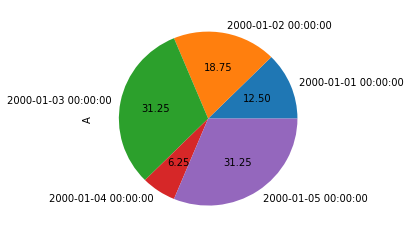

In [18]:
a.abs().plot.pie(subplots=True, figsize=(4, 4), autopct="%.2f")

## 六边形容器图

在绘制散点图时，如果数据过于密集，则无法单独绘制出每个点，这时候可以考虑 Hexbin 图。

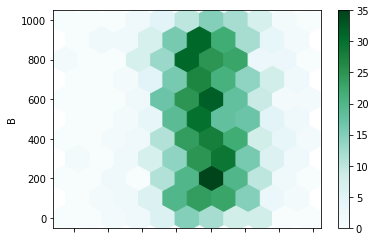

In [19]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["A", "B"])

df["B"] = df["B"] + np.arange(1000)

df.plot(kind="hexbin", x="A", y="B", gridsize=10)

其中，左边坐标表示的是值的分布，右边坐标表示的是数据量大小与颜色的对比。

一个有用的关键字参数是 `gridsize` ; 它控制x方向的六边形数量，并且默认为100.较大的格栅意味着更多的较小的分区。

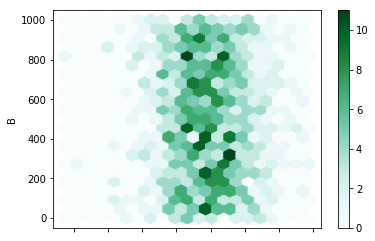

In [20]:
df.plot(kind="hexbin", x="A", y="B", gridsize=20)

------------


想要学习更多关于人工智能的知识，请关注公众号：**AI派**

![](../image/公众号—AI派.jpg)

这里我将整篇文章的内容整理成了pdf，想要pdf文件的可以在公众号后台回复关键字：**pandas**。